In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path
from matplotlib.ticker import MaxNLocator

# File locations
combined = "Resources/combined_df.csv"

# Reading the data
combined_df = pd.read_csv(combined)

In [19]:
combined_df = combined_df.drop(columns=['Unnamed: 0', 'individual'])

In [27]:
combined_df

,age,original_gender,gender,country,num_employees,employer_discuss_mh,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,request_med_leave,age groups,year
0,39.0,Male,male,United Kingdom,26-100,No,Yes,No,Maybe,Maybe,Very easy,35-44,2016
1,29.0,male,male,United States of America,6-25,Yes,Yes,Yes,Maybe,No,Somewhat easy,25-34,2016
2,38.0,Male,male,United Kingdom,6-25,No,Maybe,No,Yes,Yes,Neither easy nor difficult,35-44,2016
3,43.0,male,male,United Kingdom,No Response,No Response,Yes,Yes,Yes,Maybe,No Response,35-44,2016
4,43.0,Female,female,United States of America,6-25,No,Yes,Yes,Maybe,No,Neither easy nor difficult,35-44,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,27.0,male,male,India,More than 1000,No,No,Possibly,Maybe,No,Somewhat difficult,25-34,2019
2946,48.0,m,male,United States of America,No Response,No Response,No,No,Maybe,Maybe,No Response,45-54,2019
2947,50.0,M,male,India,No Response,No Response,No,No,Yes,No,No Response,45-54,2019
2948,30.0,female,female,India,More than 1000,No,No,Possibly,No,No,Difficult,25-34,2019


In [30]:
combined_df['bring_up_mh_issue_in_interview'].value_counts()

bring_up_mh_issue_in_interview
No       1938
Maybe     827
Yes       185
Name: count, dtype: int64

In [31]:
combined_df['bring_up_phys_issue_in_interview'].value_counts()

bring_up_phys_issue_in_interview
Maybe    1262
No        992
Yes       696
Name: count, dtype: int64

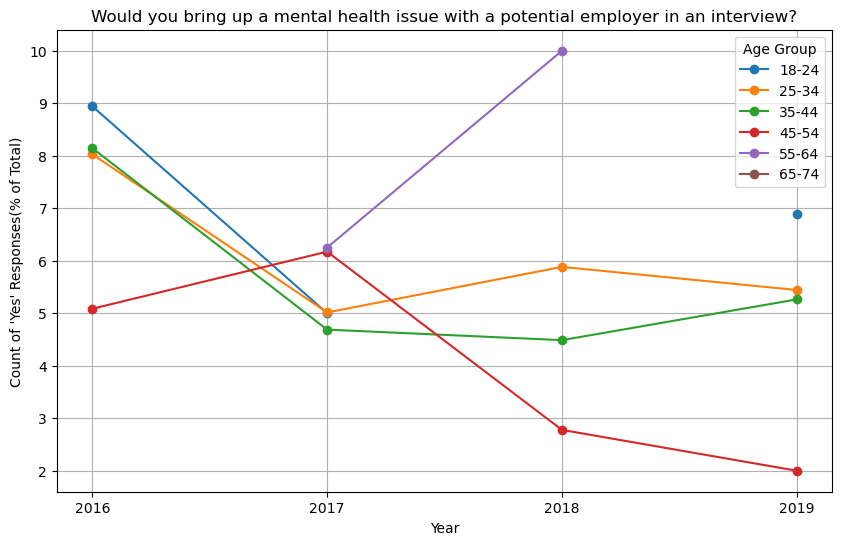

In [65]:
grouped_totals = combined_df.groupby(['age groups', 'year']).size().unstack()

yes_responses = combined_df[combined_df['bring_up_mh_issue_in_interview'] == 'Yes'].groupby(['age groups', 'year']).size().unstack()

percent_yes = ((yes_responses / grouped_totals) * 100).T

ax = percent_yes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Would you bring up a mental health issue with a potential employer in an interview?')
plt.xlabel('Year')
plt.ylabel("Count of 'Yes' Responses(% of Total)")
plt.grid()
plt.legend(title='Age Group')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('Figures/mh_int_over_years.png')
plt.show()

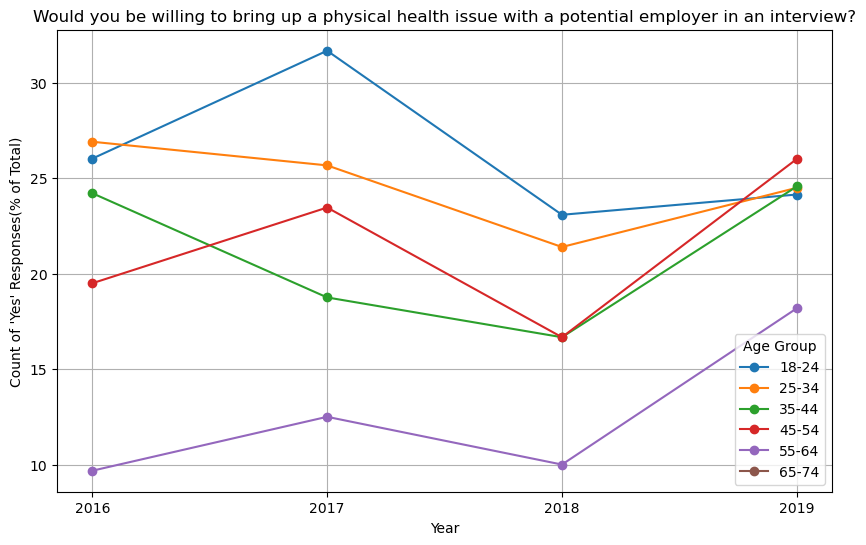

In [66]:
grouped_totals = combined_df.groupby(['age groups', 'year']).size().unstack()

yes_responses = combined_df[combined_df['bring_up_phys_issue_in_interview'] == 'Yes'].groupby(['age groups', 'year']).size().unstack()

percent_yes = ((yes_responses / grouped_totals) * 100).T

ax = percent_yes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Would you be willing to bring up a physical health issue with a potential employer in an interview?')
plt.xlabel('Year')
plt.ylabel("Count of 'Yes' Responses(% of Total)")
plt.grid()
plt.legend(title='Age Group')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('Figures/ph_int_over_years.png')
plt.show()

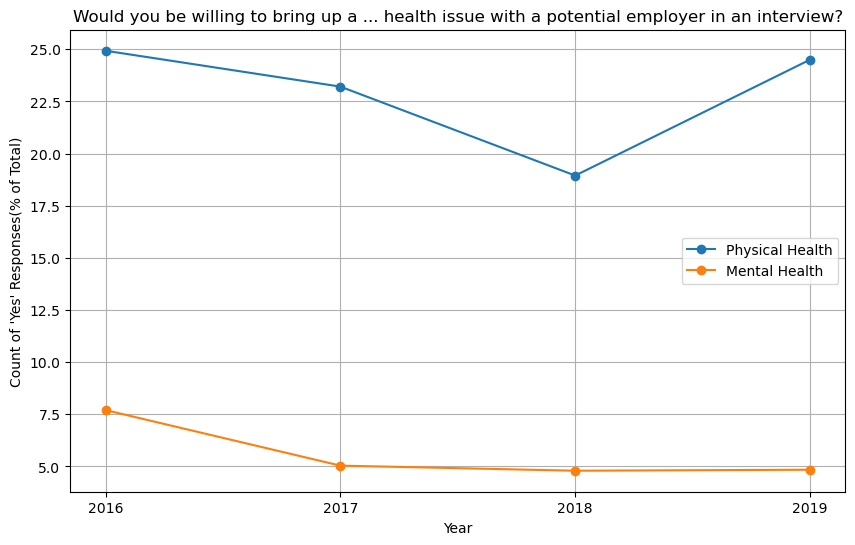

In [76]:
grouped_totals = combined_df.groupby(['year']).size()

ph_responses = combined_df[combined_df['bring_up_phys_issue_in_interview'] == 'Yes'].groupby(['year']).size()
mh_responses = combined_df[combined_df['bring_up_mh_issue_in_interview'] == 'Yes'].groupby(['year']).size()

percent_ph = ((ph_responses / grouped_totals) * 100).T
percent_mh = ((mh_responses / grouped_totals) * 100).T

ax = percent_ph.plot(kind='line', marker='o', figsize=(10, 6), label='Physical Health')
percent_mh.plot(ax=ax, marker='o', label='Mental Health')
plt.title('Would you be willing to bring up a ... health issue with a potential employer in an interview?')
plt.xlabel('Year')
plt.ylabel("Count of 'Yes' Responses(% of Total)")
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('Figures/mh_ph_interview_over_years.png')
plt.show()